In [ ]:
import os
import numpy as np
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.pyplot as plt

from v1t import data
from v1t.utils import utils, tensorboard

utils.set_random_seed(1234)

GRAY = cm.get_cmap("gray")
BACKGROUND_COLOR = "#ffffff"

tensorboard.set_font()

In [ ]:
ds_name = "franke2022"

In [ ]:
dataset, metadata = data.load_mice_data(
    ds_name=ds_name,
    mice_dir="../data/franke2022",
    load_timestamps=True,
)

In [ ]:
for i in dataset.keys():
    print(
        f"Mouse {i} (animal ID {metadata[i]['animal_id']})"
        f'\t\tnum. neurons: {dataset[i]["response"].shape[1]}'
        f'\t\tnum. trials: {dataset[i]["image"].shape[0]}'
        f'\t\tnum. test: {np.count_nonzero(metadata[i]["tiers"] == "test")}'
    )

Show behavioral information statistics

In [ ]:
for mouse_id in dataset.keys():
    print(f"\nMouse {mouse_id}")
    behavior_stats = metadata[mouse_id]["stats"]["behavior"]
    print(
        f"pupil dilation min: {behavior_stats['min'][0]:.2f}, "
        f"max: {behavior_stats['max'][0]:.2f}, "
        f"mean: {behavior_stats['mean'][0]:.2f}, "
        f"std: {behavior_stats['std'][0]:.2f}"
    )

In [17]:
# normalize array to range [0, 1]
normalize = lambda a: (a - np.min(a)) / (np.max(a) - np.min(a) + 1e-6)
# standardize array to 0 mean and unit variance
standardize = lambda a: (a - np.mean(a)) / np.std(a)

In [ ]:
N_TRIALS = 5

images, responses, behaviors = (
    dataset[0]["image"],
    dataset[0]["response"],
    dataset[0]["behavior"],
)
print(
    f"image dimension: {images.shape[1:]}\n" f"number of neurons: {responses.shape[1]}"
)

figure, axes = plt.subplots(
    nrows=N_TRIALS,
    ncols=2,
    gridspec_kw={"wspace": 0.015, "hspace": 0.2},
    figsize=(8, 3 * N_TRIALS),
    dpi=120,
    facecolor=BACKGROUND_COLOR,
)

# trials = np.random.choice(images.shape[0], size=N_TRIALS, replace=False)
x_axis = np.arange(responses.shape[1])

for i, trial in enumerate(range(N_TRIALS)):
    # plot response
    axes[i, 0].scatter(x=x_axis, y=responses[trial], s=2, alpha=0.8, color="orangered")
    axes[i, 0].set_facecolor(BACKGROUND_COLOR)
    axes[i, 0].set_ylabel(f"Trial {trial:03d}\nResponse")
    if i == N_TRIALS - 1:
        axes[i, 0].set_xlabel("Neurons")
    tensorboard.remove_top_right_spines(axis=axes[i, 0])
    axes[i, 0].set_ylim(np.min(responses[trial]), np.max(responses[trial]))
    # plot natural image
    axes[i, 1].imshow(normalize(images[trial][0]), cmap=GRAY, aspect="auto")
    axes[i, 1].set_xlabel(
        rf"pupil size: {behaviors[trial][0]:.02f}, $\Delta$ size: {behaviors[trial][1]:.02f}, speed: {behaviors[trial][2]:.02f}"
    )
    axes[i, 1].set_xticks([])
    axes[i, 1].set_yticks([])
    axes[i, 1].tick_params(axis="both", which="both", pad=0, length=0)
    tensorboard.remove_spines(axis=axes[i, 1])

# tensorboard.save_figure(
#     figure,
#     filename=f"plots/mouse{MOUSE_ID}_responses_v_images_2.png",
#     dpi=240,
#     close=False,
# )

plt.show()
plt.close(figure)

## Plot UV-green images

image dimension: (2, 36, 64)
number of neurons: 1121


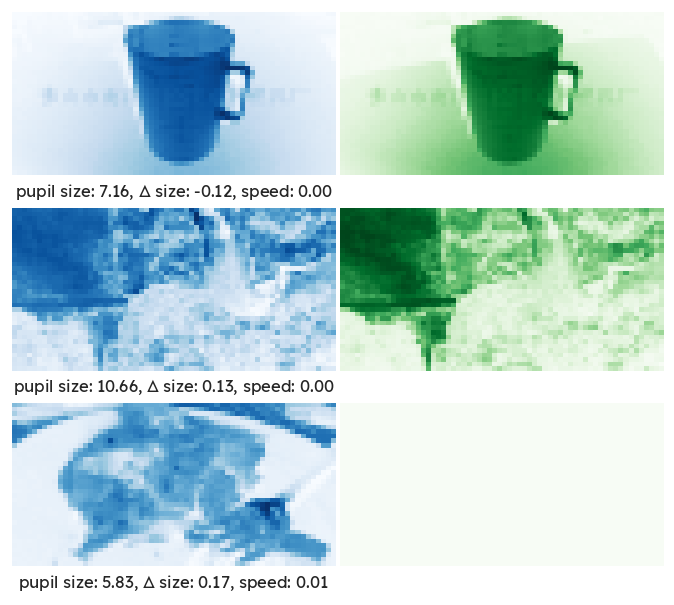

In [31]:
N_TRIALS = 3
mouse_id = "K"
images, responses, behaviors = (
    dataset[mouse_id]["image"],
    dataset[mouse_id]["response"],
    dataset[mouse_id]["behavior"],
)
print(
    f"image dimension: {images.shape[1:]}\n" f"number of neurons: {responses.shape[1]}"
)

figure, axes = plt.subplots(
    nrows=N_TRIALS,
    ncols=2,
    gridspec_kw={"wspace": 0.015, "hspace": 0.2},
    figsize=(7, 2 * N_TRIALS),
    dpi=120,
    facecolor=BACKGROUND_COLOR,
)

# trials = np.random.choice(images.shape[0], size=N_TRIALS, replace=False)
x_axis = np.arange(responses.shape[1])

for i, trial in enumerate(range(N_TRIALS)):
    # plot UV channel
    axes[i, 0].imshow(normalize(images[trial][0]), cmap="Blues", aspect="auto")
    axes[i, 0].set_xlabel(
        rf"pupil size: {behaviors[trial][0]:.02f}, $\Delta$ size: {behaviors[trial][1]:.02f}, speed: {behaviors[trial][2]:.02f}"
    )
    axes[i, 0].set_xticks([])
    axes[i, 0].set_yticks([])
    axes[i, 0].tick_params(axis="both", which="both", pad=0, length=0)
    tensorboard.remove_spines(axis=axes[i, 0])

    # plot green channel
    axes[i, 1].imshow(normalize(images[trial][1]), cmap="Greens", aspect="auto")
    axes[i, 1].set_xticks([])
    axes[i, 1].set_yticks([])
    axes[i, 1].tick_params(axis="both", which="both", pad=0, length=0)
    tensorboard.remove_spines(axis=axes[i, 1])

tensorboard.save_figure(
    figure,
    filename=f"plots/mouse{mouse_id}_franke2022_images.png",
    dpi=240,
    close=False,
)

plt.show()
plt.close(figure)